In [24]:
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import datetime
import os

Useful links
- https://www.energy.gov/oe/activities/technology-development/grid-modernization-and-smart-grid/demand-response
- https://ieeexplore.ieee.org/abstract/document/8810769
- https://www.sciencedirect.com/science/article/pii/S1050173818301117
- https://ieeexplore.ieee.org/abstract/document/8626472
- https://www.researchgate.net/profile/James_Schofield6/publication/293176172_Low_Carbon_London_project_Data_from_the_dynamic_time-of-use_electricity_pricing_trial_2013/links/56b6889d08ae5ad36059b61c.pdf

## Notes
System balancing: the matching of energy supply to the time at which energy is being requested 
Constraint management: During peak times, we cant potentially output enough energy for everyone in every location. So we need to manage the demand if possible
Demand response: Altering consumer electric usage by providing financial incentives. 
By using these tariffs, we can achieve demand response to help with both system balancing and constraint management.

## Demographic Notes

In [3]:
details = pd.read_csv('../data/acorn_details.csv',header=0,encoding='ISO-8859-1')


In [4]:
newheader = details.columns[3:]


In [5]:
newheader

Index(['ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F',
       'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L',
       'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q'],
      dtype='object')

In [6]:
details.head(3)

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0


<BarContainer object of 17 artists>

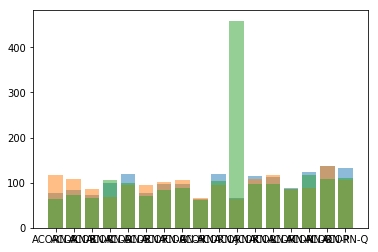

In [44]:
plt.bar(details.columns[3:],details.values[0,3:],alpha=0.5)
plt.bar(details.columns[3:],details.values[1,3:],alpha=0.5)
plt.bar(details.columns[3:],details.values[2,3:],alpha=0.5)
# clearly some outliers or scaling needs to be done here, what does this mean?

In [49]:
MCs = np.unique(details['MAIN CATEGORIES'])

array(['COMMUNITY SAFETY', 'CONTACT', 'DIGITAL', 'ECONOMY', 'EDUCATION',
       'ENVIRONMENT', 'FAMILY', 'FINANCE', 'HEALTH', 'HOUSING',
       'LEISURE TIME', 'MARKETING CHANNELS', 'POPULATION', 'SHOPPING',
       'TRANSPORT'], dtype=object)

In [18]:
?details.where

In [29]:
unqEconVals = np.unique(details.values[(details['MAIN CATEGORIES']=='ECONOMY')][:,1])
print(unqEconVals)

['Economic Activity' 'NS Socio-Economic Classifications' 'Occupation'
 'Social Grade']


In [30]:
unqEnvVals = np.unique(details.values[(details['MAIN CATEGORIES']=='ENVIRONMENT')][:,1])
print(unqEnvVals)

['Action' 'Attitude' 'Environmental Groups']


In [31]:
unqPopVals = np.unique(details.values[(details['MAIN CATEGORIES']=='POPULATION')][:,1])
print(unqPopVals)

['Age' 'Country of Birth' 'Ethnicity' 'Geography' 'Religion']


In [33]:
unqHealthVals = np.unique(details.values[(details['MAIN CATEGORIES']=='HEALTH')][:,1])
print(unqHealthVals)

['Behaviours & Lifestyle']


In [37]:
unqLTVals = np.unique(details.values[(details['MAIN CATEGORIES']=='LEISURE TIME')][:,1])
print(unqLTVals) ## do hobbies impact our usage? i doubt i, but maybe

['Books Read' 'Charities' 'Daily Newspapers' 'Holiday Destination/Type'
 'Interests & Hobbies' 'Magazines Read' 'Restaurants - Most Often'
 'Visit Pubs for a Drink - Day' 'Visit Pubs for a Drink - Evening'
 'Visit Pubs for a Meal - Day' 'Visit Pubs for a Meal - Evening']


## Consumption investigation

In [7]:
consumptionBlock0 = pd.read_csv('../data/halfhourly_dataset/block_0.csv',header=0,encoding='ISO-8859-1')


In [42]:
consumptionBlock0.head(3)

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0


In [8]:
consumptionBlock0.dtypes

LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object

In [9]:
consumptionBlock0.tstp=pd.to_datetime(consumptionBlock0.tstp,format='%Y-%m-%d %H:%M:%S.%f',errors='coerce')

In [10]:
unqHousesBlk0 = np.unique(consumptionBlock0.LCLid)
numHousesBlk0 = len(unqHousesBlk0)
print(numHousesBlk0)

50


In [11]:
def getNumSamples(df,houses):
    numEntries=[]
    for x in  houses:
        numEntries.append(df.values[(df['LCLid']==x)].shape[0])
    return numEntries

In [77]:
ne = getNumSamples(consumptionBlock0,unqHousesBlk0)

MAC000002
MAC000246
MAC000450
MAC001074
MAC003223
MAC003239
MAC003252
MAC003281
MAC003305
MAC003348
MAC003388
MAC003394
MAC003400
MAC003422
MAC003423
MAC003428
MAC003449
MAC003463
MAC003482
MAC003553
MAC003557
MAC003566
MAC003579
MAC003597
MAC003613
MAC003646
MAC003656
MAC003668
MAC003680
MAC003686
MAC003718
MAC003719
MAC003737
MAC003740
MAC003775
MAC003805
MAC003817
MAC003826
MAC003844
MAC003851
MAC003856
MAC003863
MAC003874
MAC004034
MAC004179
MAC004247
MAC004319
MAC004387
MAC004431
MAC005492


(array([ 1.,  1.,  1.,  5., 31.,  5.,  0.,  3.,  2.,  1.]),
 array([10780. , 13626.5, 16473. , 19319.5, 22166. , 25012.5, 27859. ,
        30705.5, 33552. , 36398.5, 39245. ]),
 <a list of 10 Patch objects>)

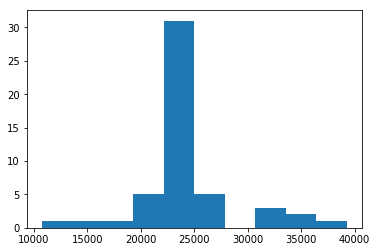

In [79]:
plt.hist(ne)

## Can we explain this discrepancy? Yes!
_largely complete set of measurement exists for all households during the trial year of 2013, with anadditional 6 months before and 2 months after the trial for a significant fraction of households. It shouldbe noted that the dToU tariff was only in effect during 2013_

...

_Consumption measurements were believed to be accurate with no more than 3.4% ofmeasurements missing in any half-hour measurement period and an average missing measurements per period ofjust 0.17%, during the trial year of 2013._

So lets filter to only 2013 data

In [12]:
just2013Blk0 = consumptionBlock0.iloc[(consumptionBlock0.tstp >= '2013-01-01').values  & (consumptionBlock0.tstp < '2014-01-01').values]

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  2.,  1., 43.]),
 array([    0.,  1752.,  3504.,  5256.,  7008.,  8760., 10512., 12264.,
        14016., 15768., 17520.]),
 <a list of 10 Patch objects>)

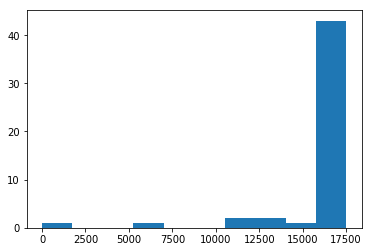

In [81]:
plt.hist(getNumSamples(just2013Blk0,unqHousesBlk0))

## lets select one good house and look at its consumption

In [13]:
somtin= unqHousesBlk0[np.array(getNumSamples(just2013Blk0,unqHousesBlk0))>16000]

In [14]:
justGoodBlock0 = just2013Blk0.iloc[just2013Blk0.LCLid.isin(somtin).values]

In [15]:
justGoodBlock0.head()

,LCLid,tstp,energy(kWh/hh)
3837,MAC000002,2013-01-01 00:00:00,0.219
3838,MAC000002,2013-01-01 00:30:00,0.241
3839,MAC000002,2013-01-01 01:00:00,0.191
3840,MAC000002,2013-01-01 01:30:00,0.235
3841,MAC000002,2013-01-01 02:00:00,0.182


In [46]:
np.unique(justGoodBlock0['LCLid'].values)

array(['MAC000002', 'MAC000246', 'MAC003223', 'MAC003239', 'MAC003252',
       'MAC003281', 'MAC003305', 'MAC003348', 'MAC003388', 'MAC003394',
       'MAC003400', 'MAC003422', 'MAC003423', 'MAC003428', 'MAC003449',
       'MAC003482', 'MAC003553', 'MAC003566', 'MAC003579', 'MAC003597',
       'MAC003613', 'MAC003646', 'MAC003656', 'MAC003668', 'MAC003680',
       'MAC003686', 'MAC003719', 'MAC003737', 'MAC003740', 'MAC003775',
       'MAC003805', 'MAC003817', 'MAC003826', 'MAC003844', 'MAC003851',
       'MAC003856', 'MAC003863', 'MAC003874', 'MAC004179', 'MAC004247',
       'MAC004319', 'MAC004387', 'MAC004431'], dtype=object)

In [17]:
with open('../data/jsutGoodHousesBlock90.pk','wb') as f:
    pk.dump(somtin,f)

In [23]:
oneHouse = (justGoodBlock0.iloc[(justGoodBlock0.LCLid=='MAC000002').values])
oneHouse.set_index('tstp')
oneHouse.to_csv('../data/MAC000002.csv')

In [24]:
oneHouse.head()

,LCLid,tstp,energy(kWh/hh)
3837,MAC000002,2013-01-01 00:00:00,0.219
3838,MAC000002,2013-01-01 00:30:00,0.241
3839,MAC000002,2013-01-01 01:00:00,0.191
3840,MAC000002,2013-01-01 01:30:00,0.235
3841,MAC000002,2013-01-01 02:00:00,0.182


In [25]:
justGoodBlock0.head()

,LCLid,tstp,energy(kWh/hh)
3837,MAC000002,2013-01-01 00:00:00,0.219
3838,MAC000002,2013-01-01 00:30:00,0.241
3839,MAC000002,2013-01-01 01:00:00,0.191
3840,MAC000002,2013-01-01 01:30:00,0.235
3841,MAC000002,2013-01-01 02:00:00,0.182


In [29]:
justGoodBlock0['Time'] = [datetime.datetime.time(d) for d in justGoodBlock0['tstp']] 

/home/bdvr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
justGoodBlock0.head()

,LCLid,tstp,energy(kWh/hh),Time
3837,MAC000002,2013-01-01 00:00:00,0.219,00:00:00
3838,MAC000002,2013-01-01 00:30:00,0.241,00:30:00
3839,MAC000002,2013-01-01 01:00:00,0.191,01:00:00
3840,MAC000002,2013-01-01 01:30:00,0.235,01:30:00
3841,MAC000002,2013-01-01 02:00:00,0.182,02:00:00


In [38]:
justGoodBlock0['energy(kWh/hh)']=justGoodBlock0['energy(kWh/hh)'].astype(float)


/home/bdvr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


energy(kWh/hh)
LCLid     Time                    
MAC000002 00:00:00        0.272301
          00:30:00        0.247060
          01:00:00        0.225293
          01:30:00        0.187364
          02:00:00        0.163408
          02:30:00        0.137003
          03:00:00        0.126436
          03:30:00        0.115575
          04:00:00        0.111625
          04:30:00        0.111397
          05:00:00        0.107814
          05:30:00        0.111792
          06:00:00        0.107490
          06:30:00        0.110575
          07:00:00        0.110904
          07:30:00        0.129403
          08:00:00        0.139767
          08:30:00        0.200082
          09:00:00        0.233948
          09:30:00        0.264844
          10:00:00        0.264652
          10:30:00        0.268430
          11:00:00        0.272888
          11:30:00        0.278334
          12:00:00        0.283929
          12:30:00        0.286299
          13:00:00        0.265685
          13:30:00        0.247641
          14:00:00        0.220225
          14:30:00        0.219230
...                            ...
MAC004431 09:00:00        0.425838
          09:30:00        0.430909
          10:00:00        0.414516
          10:30:00        0.410135
          11:00:00        0.398233
          11:30:00        0.384896
          12:00:00        0.408515
          12:30:00        0.399145
          13:00:00        0.413647
          13:30:00        0.413964
          14:00:00        0.415648
          14:30:00        0.399518
          15:00:00        0.410742
          15:30:00        0.414030
          16:00:00        0.415162
          16:30:00        0.479055
          17:00:00        0.565167
          17:30:00        0.604532
          18:00:00        0.695403
          18:30:00        0.838085
          19:00:00        0.887263
          19:30:00        0.875962
          20:00:00        0.854142
          20:30:00        0.779827
          21:00:00        0.745734
          21:30:00        0.664225
          22:00:00        0.598447
          22:30:00        0.510789
          23:00:00        0.433192
          23:30:00        0.417005

[2064 rows x 1 columns]

In [48]:
justGoodBlock0.groupby(by=['LCLid','Time']).mean().unstack().shape

(43, 48)

## Now , lets say i dont want the mean but the most granular data? as in for every day, I have the full 48 columns for every house

In [66]:
editjgb0 = justGoodBlock0

In [67]:
editjgb0['Date'] = [datetime.datetime.date(d) for d in editjgb0['tstp']] 

/home/bdvr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
editjgb0.head()

,LCLid,tstp,energy(kWh/hh),Time,Date
3837,MAC000002,2013-01-01 00:00:00,0.219,00:00:00,2013-01-01
3838,MAC000002,2013-01-01 00:30:00,0.241,00:30:00,2013-01-01
3839,MAC000002,2013-01-01 01:00:00,0.191,01:00:00,2013-01-01
3840,MAC000002,2013-01-01 01:30:00,0.235,01:30:00,2013-01-01
3841,MAC000002,2013-01-01 02:00:00,0.182,02:00:00,2013-01-01


In [62]:
editjgb0=editjgb0.set_index('LCLid')

In [63]:
editjgb0.head(3)

,tstp,energy(kWh/hh),Time,Date
LCLid,,,,
MAC000002,2013-01-01 00:00:00,0.219,00:00:00,2013-01-01
MAC000002,2013-01-01 00:30:00,0.241,00:30:00,2013-01-01
MAC000002,2013-01-01 01:00:00,0.191,01:00:00,2013-01-01


In [69]:
editjgb0.pivot_table(values='energy(kWh/hh)',index=['LCLid','Date'],columns='Time')

Time                  00:00:00  00:30:00  01:00:00  01:30:00  02:00:00  \
LCLid     Date                                                           
MAC000002 2013-01-01     0.219     0.241     0.191     0.235     0.182   
          2013-01-02     0.253     0.211     0.347     0.280     0.261   
          2013-01-03     0.196     0.239     0.235     0.195     0.239   
          2013-01-04     0.257     0.263     0.296     0.284     0.241   
          2013-01-05     0.195     0.208     0.171     0.226     0.188   
          2013-01-06     0.257     0.268     0.213     0.270     0.233   
          2013-01-07     0.241     0.229     0.169     0.089     0.118   
          2013-01-08     0.229     0.251     0.223     0.104     0.131   
          2013-01-09     0.266     0.263     0.242     0.295     0.240   
          2013-01-10     0.166     0.173     0.181     0.157     0.193   
          2013-01-11     0.253     0.204     0.263     0.225     0.143   
          2013-01-12     0.259     0.226     0.263     0.277     0.254   
          2013-01-13     0.255     0.247     0.219     0.263     0.212   
          2013-01-14     0.204     0.247     0.235     0.240     0.247   
          2013-01-15     0.232     0.248     0.222     0.259     0.128   
          2013-01-16     0.248     0.335     0.290     0.205     0.153   
          2013-01-17     0.218     0.252     0.236     0.251     0.212   
          2013-01-18     0.201     0.249     0.220     0.247     0.239   
          2013-01-19     0.183     0.186     0.171     0.159     0.172   
          2013-01-20     0.257     0.226     0.231     0.234     0.186   
          2013-01-21     0.210     0.251     0.211     0.263     0.213   
          2013-01-22     0.208     0.251     0.219     0.251     0.230   
          2013-01-23     0.208     0.251     0.214     0.259     0.208   
          2013-01-24     0.256     0.204     0.252     0.214     0.244   
          2013-01-25     0.274     0.225     0.258     0.220     0.245   
          2013-01-26     0.256     0.241     0.253     0.222     0.262   
          2013-01-27     0.235     0.181     0.209     0.142     0.183   
          2013-01-28     0.208     0.260     0.213     0.225     0.101   
          2013-01-29     0.254     0.219     0.260     0.164     0.113   
          2013-01-30     0.202     0.323     0.284     0.229     0.220   
...                        ...       ...       ...       ...       ...   
MAC004431 2013-12-02     0.284     0.276     0.372     0.400     0.303   
          2013-12-03     0.209     0.210     0.161     0.237     0.175   
          2013-12-04     0.218     0.179     0.195     0.150     0.113   
          2013-12-05     0.165     0.144     0.132     0.115     0.191   
          2013-12-06     0.252     0.238     0.109     0.112     0.115   
          2013-12-07     0.355     0.315     0.253     0.261     0.363   
          2013-12-08     0.446     0.345     0.250     0.293     0.307   
          2013-12-09     0.162     0.133     0.161     0.236     0.161   
          2013-12-10     0.306     0.180     0.105     0.099     0.138   
          2013-12-11     0.178     0.122     0.178     0.273     0.153   
          2013-12-12     0.239     0.186     0.122     0.111     0.150   
          2013-12-13     0.214     0.258     0.260     0.197     0.147   
          2013-12-14     0.186     0.208     0.250     0.247     0.267   
          2013-12-15     0.324     0.359     0.325     0.239     0.273   
          2013-12-16     0.335     0.332     0.328     0.244     0.224   
          2013-12-17     0.307     0.367     0.305     0.214     0.220   
          2013-12-18     0.341     0.231     0.227     0.334     0.396   
          2013-12-19     0.320     0.216     0.222     0.332     0.451   
          2013-12-20     0.247     0.203     0.267     0.372     0.319   
          2013-12-21     0.374     0.301     0.397     0.406     0.308   
          2013-12-22     0.426     0.372     0.237     0.251     0.277   
    

In [3]:
firstFile = pd.read_csv('../data/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_1.csv',header=0,encoding='ISO-8859-1')

In [8]:
firstFile.tail()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
999995,MAC000036,Std,2012-11-08 08:00:00.0000000,0.228,ACORN-E,Affluent
999996,MAC000036,Std,2012-11-08 08:30:00.0000000,0.042,ACORN-E,Affluent
999997,MAC000036,Std,2012-11-08 09:00:00.0000000,0.076,ACORN-E,Affluent
999998,MAC000036,Std,2012-11-08 09:30:00.0000000,0.07,ACORN-E,Affluent
999999,MAC000036,Std,2012-11-08 10:00:00.0000000,0.005,ACORN-E,Affluent


In [9]:
secondFile = pd.read_csv('../data/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_2.csv',header=0,encoding='ISO-8859-1')

In [10]:
secondFile.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000036,Std,2012-11-08 10:30:00.0000000,0.003,ACORN-E,Affluent
1,MAC000036,Std,2012-11-08 11:00:00.0000000,0.032,ACORN-E,Affluent
2,MAC000036,Std,2012-11-08 11:30:00.0000000,0.035,ACORN-E,Affluent
3,MAC000036,Std,2012-11-08 12:00:00.0000000,0,ACORN-E,Affluent
4,MAC000036,Std,2012-11-08 12:30:00.0000000,0,ACORN-E,Affluent


<BarContainer object of 11 artists>

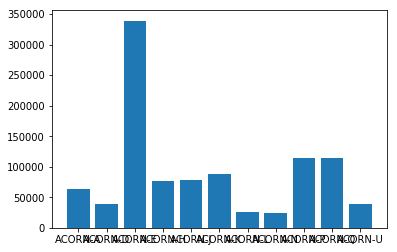

In [18]:
s = firstFile.groupby(by=['Acorn']).count()['LCLid']
plt.bar(s.index,s)

<BarContainer object of 10 artists>

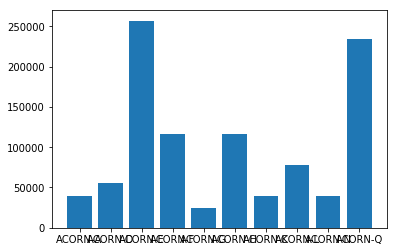

In [19]:
s = secondFile.groupby(by=['Acorn']).count()['LCLid']
plt.bar(s.index,s)

1000000

In [35]:
def iterateOverAll():
    counter = 1
    d = '../data/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/'
    for filename in os.listdir(d):
        inFile = pd.read_csv(os.path.join(d,filename),header=0,encoding='ISO-8859-1')
        if('Std' not in inFile.groupby(by=['stdorToU']).count()['LCLid'].index):
            print(filename)
iterateOverAll()
    

Power-Networks-LCL-June2015(withAcornGps)v2_166.csv
Power-Networks-LCL-June2015(withAcornGps)v2_167.csv
Power-Networks-LCL-June2015(withAcornGps)v2_155.csv
Power-Networks-LCL-June2015(withAcornGps)v2_160.csv
Power-Networks-LCL-June2015(withAcornGps)v2_165.csv
Power-Networks-LCL-June2015(withAcornGps)v2_151.csv
Power-Networks-LCL-June2015(withAcornGps)v2_141.csv
Power-Networks-LCL-June2015(withAcornGps)v2_146.csv
Power-Networks-LCL-June2015(withAcornGps)v2_168.csv
Power-Networks-LCL-June2015(withAcornGps)v2_153.csv
Power-Networks-LCL-June2015(withAcornGps)v2_148.csv
Power-Networks-LCL-June2015(withAcornGps)v2_138.csv
Power-Networks-LCL-June2015(withAcornGps)v2_142.csv
Power-Networks-LCL-June2015(withAcornGps)v2_145.csv
Power-Networks-LCL-June2015(withAcornGps)v2_162.csv
Power-Networks-LCL-June2015(withAcornGps)v2_149.csv
Power-Networks-LCL-June2015(withAcornGps)v2_164.csv
Power-Networks-LCL-June2015(withAcornGps)v2_156.csv
Power-Networks-LCL-June2015(withAcornGps)v2_137.csv
Power-Networ

In [36]:
onlyToUFile = pd.read_csv('../data/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_166.csv',header=0,encoding='ISO-8859-1')

In [37]:
np.unique(onlyToUFile['LCLid'])

array(['MAC005157', 'MAC005159', 'MAC005160', 'MAC005161', 'MAC005162',
       'MAC005164', 'MAC005171', 'MAC005172', 'MAC005173', 'MAC005179',
       'MAC005180', 'MAC005184', 'MAC005186', 'MAC005189', 'MAC005190',
       'MAC005197', 'MAC005200', 'MAC005204', 'MAC005207', 'MAC005212',
       'MAC005240', 'MAC005250', 'MAC005255', 'MAC005256', 'MAC005266',
       'MAC005271', 'MAC005278', 'MAC005279', 'MAC005281', 'MAC005284',
       'MAC005290'], dtype=object)